In [3]:
import pandas as pd
import folium
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import sqlite3

In [4]:
stopandsearchdf_with_lsoa_hendon = pd.read_csv('stopandsearch_with_lsoa_hendon.csv')

In [5]:
stopandsearchdf_with_lsoa_hendon['Outcome'].unique()

array(['Nothing found - no further action',
       'Offender given penalty notice', 'Suspect summonsed to court',
       'Offender given drugs possession warning', 'Suspect arrested',
       'Article found - Detailed outcome unavailable', 'Local resolution',
       'A no further action disposal', 'Arrest',
       'Penalty Notice for Disorder', 'Khat or Cannabis warning',
       'Summons / charged by post', 'Community resolution',
       'Caution (simple or conditional)'], dtype=object)

Filter stop and search data in Heldon

In [ ]:
#First method
#outcomes = input("Enter the stop and search outcomes to filter by (separated by commas): ").split(',')
#stopandsearchdf_with_lsoa_hendon = stopandsearchdf_with_lsoa_hendon[stopandsearchdf_with_lsoa_hendon['Outcome'].isin(outcomes)].copy()

#Second method
#outcome =  str(input("Enter the stop and search outcome to filter by: "))
#stopandsearchdf_with_lsoa_hendon = stopandsearchdf_with_lsoa_hendon[stopandsearchdf_with_lsoa_hendon['Outcome'] != outcome].copy()

In [ ]:
stopandsearchdf_with_lsoa_hendon

In [7]:
df_burlg = pd.read_csv('burg_count_by_season_lsoa.csv')
df_burlg

,LSOA code,season,count
0,E01000001,1,21
1,E01000001,2,45
2,E01000001,3,24
3,E01000002,1,44
4,E01000002,2,22
...,...,...,...
104251,W01001957,2,18
104252,W01001957,3,31
104253,W01001958,1,26
104254,W01001958,2,34


In [8]:
df_hendon_burg = df_burlg[df_burlg['LSOA code'].isin(stopandsearchdf_with_lsoa_hendon['lsoa11cd'].values)]

In [17]:
sum(df_hendon_burg[df_hendon_burg['season'] == 3]['count'])

1662

In [23]:
count_s_s = stopandsearchdf_with_lsoa_hendon.groupby(by = ['lsoa11cd', 'season'] , as_index=False).count()
count_s_s = count_s_s[['lsoa11cd', 'season', 'Latitude']]
count_s_s.columns = ['LSOA code', 'season', 'count_stop_search']
count_s_s
sum(count_s_s[count_s_s['season'] == 1]['count_stop_search'])

890

In [24]:
merged_df = count_s_s.merge(df_hendon_burg, on=['LSOA code', 'season'])
merged_df.columns = ['LSOA code', 'season', 'count_stop_search', 'count_burlg']

merged_df

,LSOA code,season,count_stop_search,count_burlg
0,E01000236,1,30,78
1,E01000236,2,22,67
2,E01000236,3,17,79
3,E01000237,1,77,89
4,E01000237,2,103,108
5,E01000237,3,83,115
6,E01000238,1,18,104
7,E01000238,2,14,70
8,E01000238,3,9,103
9,E01000239,1,46,89


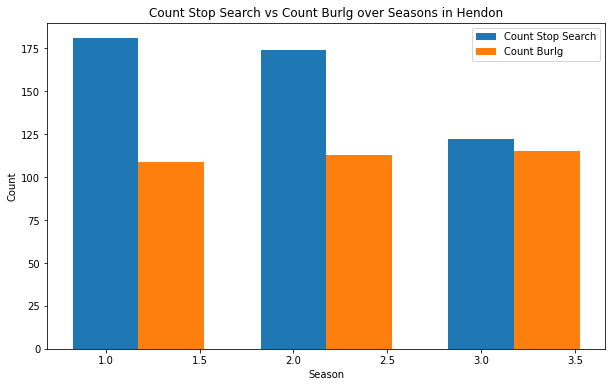

In [25]:
df = merged_df
# Assuming you have a DataFrame called 'df' with columns: lsoa11cd, Year, count_stop_search, count_burlg
plt.figure(figsize=(10, 6))  # Set the figure size as desired

bar_width = 0.35  # Width of the bars
index = df['season']  # X-axis values

plt.bar(index, df['count_stop_search'], bar_width, label='Count Stop Search')
plt.bar(index + bar_width, df['count_burlg'], bar_width, label='Count Burlg')

plt.xlabel('Season')
plt.ylabel('Count')
plt.title('Count Stop Search vs Count Burlg over Seasons in Hendon')
plt.legend()



In [12]:
correlation = df['count_stop_search'].corr(df['count_burlg'])
print("Correlation between count_stop_search and count_burlg:", correlation)


Correlation between count_stop_search and count_burlg: 0.35732498166119314


In [26]:
stop_seach_burlg_Hendon = merged_df.copy()

In [27]:
lsoa_coord = stopandsearchdf_with_lsoa_hendon[['LSOA_code', 'Latitude', 'Longitude' ]]
lsoa_coord.columns = ['LSOA code', 'Latitude', 'Longitude' ]
lsoa_coord.dropna()

,LSOA code,Latitude,Longitude
0,E01000307,51.573671,-0.225991
1,E01000307,51.573671,-0.225991
2,E01000307,51.573671,-0.225991
3,E01000240,51.601192,-0.234045
4,E01000240,51.601192,-0.234045
...,...,...,...
2679,E01000243,51.591318,-0.220929
2680,E01000243,51.589405,-0.221369
2681,E01000237,51.584334,-0.223541
2682,E01000237,51.584334,-0.223541


In [33]:
hendon_lsoa_ss = stop_seach_burlg_Hendon.merge(lsoa_coord, on='LSOA code')
hendon_lsoa_ss = hendon_lsoa_ss.drop_duplicates()

In [34]:
hendon_lsoa_ss

,LSOA code,season,count_stop_search,count_burlg,Latitude,Longitude
0,E01000236,1,30,78,51.584965,-0.212373
2,E01000236,1,30,78,51.582987,-0.215323
4,E01000236,1,30,78,51.586767,-0.210858
7,E01000236,1,30,78,51.582107,-0.213048
16,E01000236,1,30,78,51.584870,-0.215018
...,...,...,...,...,...,...
8013,E01000314,3,13,101,51.582430,-0.230832
8018,E01000314,3,13,101,51.584769,-0.230308
8026,E01000314,3,13,101,51.583919,-0.231770
8031,E01000314,3,13,101,51.580918,-0.228350


In [32]:
# Assuming you have the barnet_lsoa_ss DataFrame

# Filter the DataFrame by a specific year
season = int(input("Enter the season to filter by: "))
#Input outcome for stop and search 

filtered_df = hendon_lsoa_ss[hendon_lsoa_ss['season'] == season]

# Create the bubble map using plotly
fig = px.scatter_mapbox(filtered_df, lat='Latitude', lon='Longitude', color='count_stop_search',
                        size='count_stop_search', hover_data=['LSOA code', 'count_stop_search'],
                        mapbox_style='open-street-map', zoom=10)

# Customize the appearance of the map
fig.update_layout(title=f"Bubble Map of Stop Searches in Hendon for {season}",
                  mapbox=dict(center=dict(lat=filtered_df['Latitude'].mean(),
                                          lon=filtered_df['Longitude'].mean())))
print(hendon_lsoa_ss['count_stop_search'].sum())
# Show the plot
fig.show()

Enter the season to filter by: 1
627866


In [37]:
# Assuming you have the barnet_lsoa_ss DataFrame

# Filter the DataFrame by a specific year
season = int(input("Enter the season to filter by: "))


#Input outcome for stop and search 

filtered_df = hendon_lsoa_ss[hendon_lsoa_ss['season'] == season]

# Create the bubble map using plotly
fig = px.scatter_mapbox(filtered_df, lat='Latitude', lon='Longitude', color='count_burlg',
                        size='count_burlg', hover_data=['LSOA code', 'count_burlg'],
                        mapbox_style='open-street-map', zoom=10)

# Customize the appearance of the map
fig.update_layout(title=f"Bubble Map of Burglaries in Hendon for {season}",
                  mapbox=dict(center=dict(lat=filtered_df['Latitude'].mean(),
                                          lon=filtered_df['Longitude'].mean())))

# Show the plot
fig.show()

Enter the season to filter by: 3


In [15]:
#season 1, stop and search total
sum(hendon_lsoa_ss[hendon_lsoa_ss['season'] == 1]['count_stop_search'])

NameError: name 'hendon_lsoa_ss' is not defined

In [19]:
#season 2, stop and search total
sum(hendon_lsoa_ss[hendon_lsoa_ss['season'] == 2]['count_stop_search'])

186842

In [20]:
#season 3, stop and search total
sum(hendon_lsoa_ss[hendon_lsoa_ss['season'] == 3]['count_stop_search'])

143682

In [21]:
#season 1, burglary total
sum(hendon_lsoa_ss[hendon_lsoa_ss['season'] == 1]['count_burlg'])

217054

In [22]:
#season 2, burglary total
sum(hendon_lsoa_ss[hendon_lsoa_ss['season'] == 2]['count_burlg'])

195009

In [23]:
#season 3, burglary total
sum(hendon_lsoa_ss[hendon_lsoa_ss['season'] == 3]['count_burlg'])

224248

<h1 style="font-size: 24px;">Bubble maps having the same max_value in the colour legened, no matter what season someone inputs

Stop and Search Data

In [24]:


# Filter the DataFrame by a specific year
season = int(input("Enter the season to filter by: "))

# Filter the DataFrame for the specified season
filtered_df = hendon_lsoa_ss[hendon_lsoa_ss['season'] == season]

# Calculate the maximum value for the 'count_stop_search' column across all seasons
max_value = hendon_lsoa_ss['count_stop_search'].max()

# Create the bubble map using plotly
fig = px.scatter_mapbox(filtered_df, lat='Latitude', lon='Longitude', color='count_stop_search',
                        size='count_stop_search', hover_data=['LSOA code', 'count_stop_search'],
                        mapbox_style='open-street-map', zoom=10, range_color=(0, max_value))

# Customize the appearance of the map
fig.update_layout(title=f"Bubble Map of Stop Searches in Hendon for season {season}",
                  mapbox=dict(center=dict(lat=filtered_df['Latitude'].mean(),
                                          lon=filtered_df['Longitude'].mean())))

# Show the plot
fig.show()


Enter the season to filter by: 1


Burglary Data

In [40]:

# Filter the DataFrame by a specific year
season = int(input("Enter the season to filter by: "))

# Filter the DataFrame for the specified season
filtered_df = hendon_lsoa_ss[hendon_lsoa_ss['season'] == season]

# Calculate the maximum value for the 'count_stop_search' column across all seasons
max_value = hendon_lsoa_ss['count_burlg'].max()

# Create the bubble map using plotly
fig = px.scatter_mapbox(filtered_df, lat='Latitude', lon='Longitude', color='count_burlg',
                        size='count_burlg', hover_data=['LSOA code', 'count_burlg'],
                        mapbox_style='open-street-map', zoom=10, range_color=(0, max_value))

# Customize the appearance of the map
fig.update_layout(title=f"Bubble Map of Stop Searches in Hendon for season {season}",
                  mapbox=dict(center=dict(lat=filtered_df['Latitude'].mean(),
                                          lon=filtered_df['Longitude'].mean())))

# Show the plot
fig.show()

Enter the season to filter by: 3


Statistics for stop and searches and burglaries 

In [32]:
import pandas as pd

# Calculate the sums for each season and column
seasons = [1, 2, 3]
columns = ['count_stop_search', 'count_burlg']
data = []

for season in seasons:
    row = []
    for column in columns:
        total = hendon_lsoa_ss[hendon_lsoa_ss['season'] == season][column].sum()
        row.append(total)
    data.append(row)

# Create a DataFrame with the sums
table_df = pd.DataFrame(data, columns=columns, index=seasons)

# Display the table
table_df.columns = ['Total number of stop and searches ', 'Total number of burglaries']
table_df = table_df.rename_axis('season')
table_df


,Total number of stop and searches,Total number of burglaries
season,,
1,179705,217054
2,186842,195009
3,143682,224248
